<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods


In an IPython notebook, use the scipy implementation and find the first solution to the equation, write a function with the bisection methods.

What is the solution if a=1, and b=1, what is the solution if a=2 and b=2


In [ ]:
import numpy as np
from scipy import optimize
import math
import matplotlib.pyplot as plt
import sympy as sp



###1. $ 7 = a\sqrt{x^2+1}+be^x\sin x $

In [ ]:
def f(x,a,b):
  return a*np.sqrt(x**2+1)+b*np.exp(x)*np.sin(x)-7

In [ ]:
#con a=1 y b=1
root=optimize.bisect(f,1,2,args=(1,1),xtol=2e-17) #funcion, rango, argumentos 
root

1.628718494927008

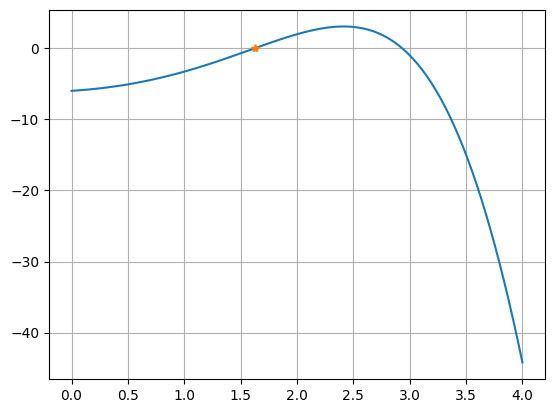

In [ ]:
x=np.linspace(0,4,100)
params=(1,1)
plt.plot(x,f(x,*params))
plt.grid()
plt.plot(root,0,'*')

In [ ]:
#con a=2 y b=2
root2=optimize.bisect(f,3,4,args=(2,2),xtol=2e-17)
root2

3.132350594242366

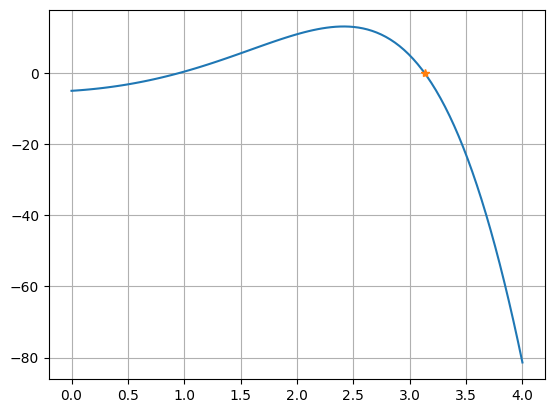

In [ ]:
x=np.linspace(0,4,100)
params=(2,2)
plt.plot(x,f(x,*params))
plt.plot(root2,0,'*')
plt.grid()


  
 2. $a e^{x}-2= b\cos(e^x-2)$

In [ ]:
#definimos la funcion

def ff(x, a, b):
  return 2-a*np.exp(x)+b*np.cos(np.exp(x)-2)

In [ ]:
#hallar el punto para a=1 , b=1

p= optimize.bisect(ff,0.5,2,args=(1,1))
p

1.0076239716586315

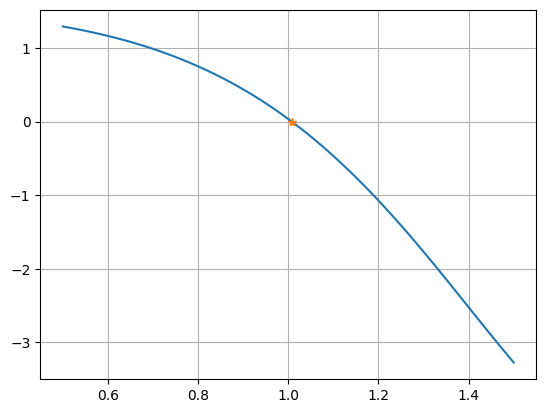

In [ ]:
x=np.linspace(0.5,1.5,100)
params=(1,1)
plt.plot(x,ff(x,*params))
plt.plot(p,0,'*')
plt.grid()


In [ ]:
#hallar el punto para a=2 , b=2

p= optimize.bisect(ff,0,1,args=(2,2))
p

0.6931471805601177

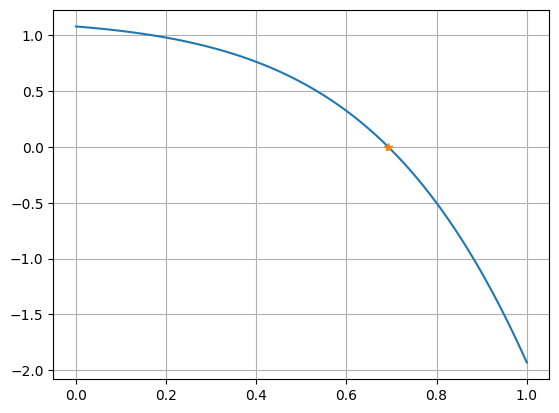

In [ ]:
x=np.linspace(0,1,100)
params=(2,2)
plt.plot(x,ff(x,*params))
plt.plot(p,0,'*')
plt.grid()

3. **ACTIVITY** 
    
In an IPython notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

In [ ]:
def funcos(x):
  return x - np.cos(x)

def funcosprim(x):
  return np.sin(x) + 1
  

In [ ]:
#calculamos la derivada
#derivada 


def funcosx(x):
   return x - sp.cos(x)

x=sp.Symbol("x")

df= sp.diff(funcosx(x),x)
df

sin(x) + 1

In [ ]:
pn = optimize.newton(funcos,1,funcosprim)

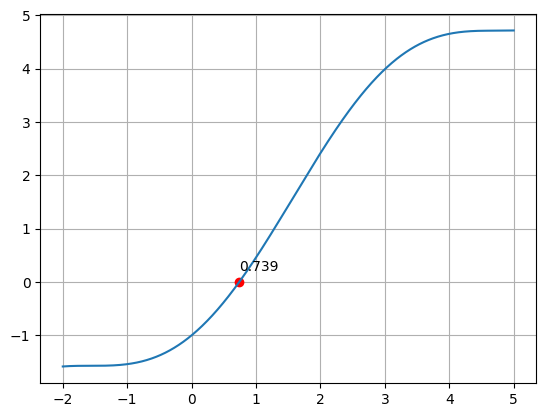

In [ ]:
x=np.linspace(-2,5,1000)
pn = optimize.newton(funcos,1,funcosprim)
plt.plot(pn,0,"ro")
plt.text(pn,0.2,f'{pn:.3}')
plt.plot(x,funcos(x))
plt.grid()

Metodo de newton // trabajo de clase

In [ ]:
#Empleemos el metodo de Newton para calcular

#definimos la funcion
def fun(x):
  t = np.sqrt(x**2+1)+np.exp(x)*np.sin(x)-7
  return t 

def funprima(x):
  t1= np.exp(x) * np.cos(x)
  t2= np.exp(x) * np.sin(x)
  t3= x/(np.sqrt(x**2 + 1))
  return t1+t2+t3

In [ ]:
optimize.newton(fun,3.5,funprima)

2.9321585327957487

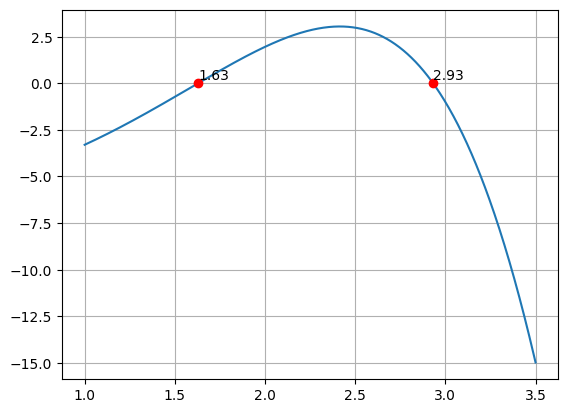

In [ ]:
x=np.linspace(1,3.5,1000)
p=optimize.newton(fun,3.5,funprima)
p2=optimize.newton(fun,2,funprima)
plt.plot(x,fun(x))
plt.plot(p,0,"ro")
plt.plot(p2,0,"ro")
plt.text(p,0.2,f'{p:.3}')
plt.text(p2,0.2,f'{p2:.3}')
plt.grid()
#plt.xlim(0,10)


In [ ]:
#definimos la derivada de la funcion 

x=sp.Symbol("x")
a=sp.Symbol("a")
b=sp.Symbol("b")


In [ ]:
def funx(x):
  f=sp.sqrt(x**2+1)+sp.exp(x)*sp.sin(x)-7
  return f


In [ ]:
#derivada 
df= sp.diff(funx(x),x)
df

x/sqrt(x**2 + 1) + exp(x)*sin(x) + exp(x)*cos(x)

In [ ]:
#para poder evaluar la derivada en numpy
funcion = sp.lambdify(x,funx(x),"numpy")
df_=sp.lambdify(x,df,"numpy")

In [ ]:
#metodo de la SECANTE
#NECESITA DOS PUNTOS EL PUNTO ENCIMO U EL PUNTO ENECIMO -1

3. Fixed point methods. 

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

In [ ]:
r=sp.symbols ("r")
R=sp.symbols ("R")
rho0=sp.symbols("rho0")
L=sp.symbols("L")
rho_=sp.symbols("rho_")
M = 4*sp.pi*rho0*sp.integrate(r**2*sp.exp(-r/L), (r, 0, R))
M

4*pi*rho0*(2*L**3 + (-2*L**3 - 2*L**2*R - L*R**2)*exp(-R/L))

In [ ]:
def mass(R, L, rho) :
  return 4*np.pi*rho* ( 2*L**3 + (-2*L**3-2*L**2*R-L*R**2) *np. exp (- R/L) )

def mass_g(Rterrestre, rho_):
  return (1.75*Rterrestre)**3*4*np.pi*rho_/3

L = 6500E3
pho = 18000
rho_= 5520
Rterrestre = 6371E3
masa_tierra = 5.97224
mm=mass_g (Rterrestre, rho_)/masa_tierra
R=np. linspace (1, 16000E3, 1000)
F= (mass_g(Rterrestre, rho_) -mass (R, L, rho_) )/masa_tierra

Text(0, 0.5, 'M(masa_tierra)')

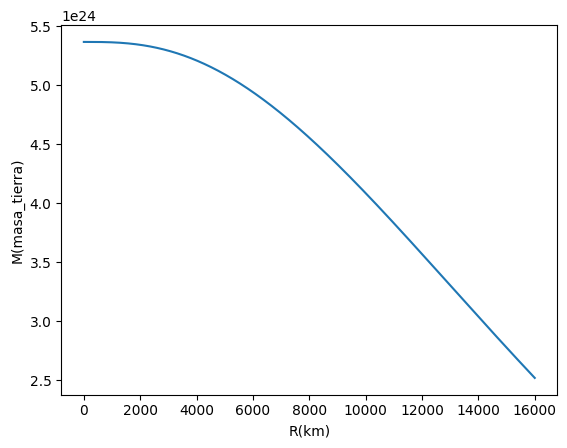

In [ ]:
plt.plot(R/1E3,F )
plt.xlabel("R(km)")
plt.ylabel("M(masa_tierra)")

In [ ]:
import numpy as np
from scipy import optimize
import math
import matplotlib.pyplot as plt
import sympy as sp



In [ ]:
#definimos la funcion
def fun(x):
  t = np.sqrt(x**2+1)+np.exp(x)*np.sin(x)-7
  return t 

def g(x):
  g= x - fun(x)
  return g

In [ ]:
p= optimize.fixed_point(g,0)
p


array(-6.92879849)

In [ ]:
fun(p)

0.0

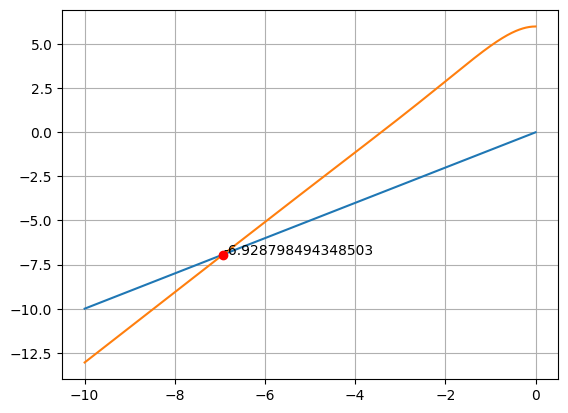

In [ ]:
p= optimize.fixed_point(g,0)
x=np.linspace(-10,0,1000)
plt.plot(x,x)
plt.plot(x,g(x))
plt.plot(p,p,"ro")
plt.text(p,p,f'{p}')
plt.grid()
#plt.xlim(0,10)


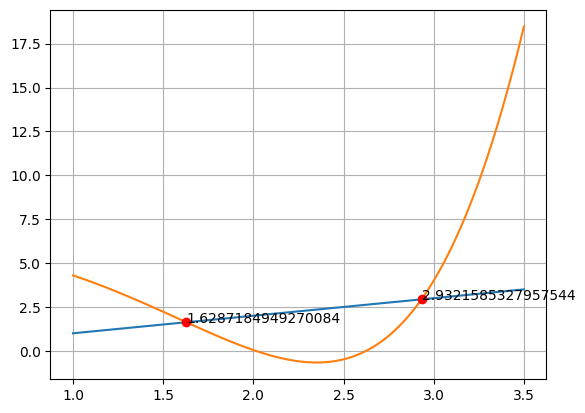

In [ ]:
p2= optimize.fixed_point(g,2)
p3= optimize.fixed_point(g,3)
x=np.linspace(1,3.5,100)
plt.plot(x,x)
plt.plot(x,g(x))
plt.plot(p2,p2,"ro")
plt.text(p2,p2,f'{p2}')
plt.plot(p3,p3,"ro")
plt.text(p3,p3,f'{p3}')
plt.grid()
#plt.xlim(0,10)



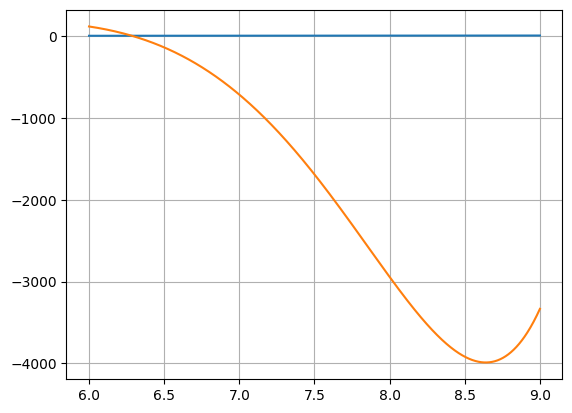

In [ ]:
p4=optimize.fixed_point(g,9)
x=np.linspace(6,9,1000)
plt.plot(x,x)
plt.plot(x,g(x))

plt.grid()
#plt.xlim(0,10)

##trabajo en clase

In [ ]:

def f(x):
  return (x**2 - 1)


root = optimize.bisect(f, 0, 2)
root

root = optimize.bisect(f, -2, 0)
root
-1.0


-1.0